<a href="https://colab.research.google.com/github/matheustoneti/SolarRadiationPrediction-NASAHackathon/blob/main/Solar_Radiation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/SolarPrediction.csv')

In [5]:
df.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00


In [11]:
df['Time'] = pd.to_datetime(df['Time']).dt.hour

In [20]:
df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise']).dt.minute

In [21]:
df['TimeSunSet'] = pd.to_datetime(df['TimeSunSet']).dt.minute

In [27]:
df = df.drop(['Data'], axis=1)

In [28]:
df.describe()

,UNIXTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,11.557425,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869,27.640519,37.317904
std,3.005037e+06,6.912034,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474,15.518714,15.938416
min,1.472724e+09,0.000000,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,7.000000,0.000000
25%,1.475546e+09,6.000000,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000,14.000000,26.000000
50%,1.478026e+09,12.000000,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000,24.000000,43.000000
75%,1.480480e+09,18.000000,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000,40.000000,48.000000
max,1.483265e+09,23.000000,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000,57.000000,59.000000


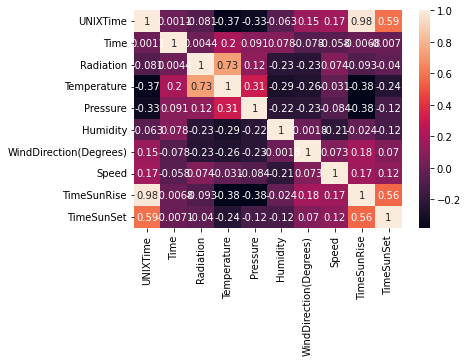

In [29]:
sns.heatmap(df.corr(), annot=True)

In [30]:
y = df['Radiation']
x = df.drop(['Radiation'], axis=1)

In [31]:
x.info

<bound method DataFrame.info of          UNIXTime  Time  Temperature  Pressure  Humidity  \
0      1475229326    23           48     30.46        59   
1      1475229023    23           48     30.46        58   
2      1475228726    23           48     30.46        57   
3      1475228421    23           48     30.46        60   
4      1475228124    23           48     30.46        62   
...           ...   ...          ...       ...       ...   
32681  1480587604     0           44     30.43       102   
32682  1480587301     0           44     30.42       102   
32683  1480587001     0           44     30.42       102   
32684  1480586702     0           44     30.42       101   
32685  1480586402     0           44     30.43       101   

       WindDirection(Degrees)  Speed  TimeSunRise  TimeSunSet  
0                      177.39   5.62           13          13  
1                      176.78   3.37           13          13  
2                      158.75   3.37           13      

In [33]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Time                    32686 non-null  int64  
 2   Temperature             32686 non-null  int64  
 3   Pressure                32686 non-null  float64
 4   Humidity                32686 non-null  int64  
 5   WindDirection(Degrees)  32686 non-null  float64
 6   Speed                   32686 non-null  float64
 7   TimeSunRise             32686 non-null  int64  
 8   TimeSunSet              32686 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 2.2 MB


In [37]:
x.isnull().sum()

UNIXTime                  0
Time                      0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

## Dados pré-processados. Agora, separar os dados entre treino e teste, treinar e aplicar o modelo de regressão.

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=(0.3))

In [45]:
modelo = DecisionTreeRegressor()

In [46]:
modelo = modelo.fit(x_train, y_train)

In [47]:
accuracy = modelo.score(x_test, y_test)

In [48]:
print(accuracy)

0.8839004639871805
